In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.append('/glade/u/home/noahrose/ECCOv4-py')
import ecco_v4_py as ecco
import xarray as xr
import cartopy.crs as ccrs
from cmocean import cm
import cartopy.feature as cfeature
from matplotlib import animation

In [2]:
grid = xr.open_dataset('/glade/work/noahrose/emu_test/ECCO-GRID.nc')

In [42]:
adj_fname = '/glade/work/noahrose/emu_samw/emu_adj_1_1_3_SAMW_IO_mask.bin_1/output/adxx_tauu.0000000129.data'

In [43]:
adj_compact = np.fromfile(adj_fname,dtype='>f4')
nx = 90
ny = 1170
nt = adj_compact.shape[0]//nx//ny
adj_tiles = ecco.llc_compact_to_tiles(adj_compact.reshape(nt,ny,nx))

lons, lats,\
lon_edges, lat_edges,\
adj_rg =\
        ecco.resample_to_latlon(grid.XC, \
                                grid.YC, \
                                adj_tiles,\
                                -90, 90, 1,\
                                -180, 180, 1,\
                                fill_value = np.nan, \
                                mapping_method = 'nearest_neighbor',
                                radius_of_influence = 120000)

llc_compact_to_faces: dims, llc  (7, 1170, 90) 90
llc_compact_to_faces: data_compact array type  >f4
llc_faces_to_tiles: data_tiles shape  (7, 13, 90, 90)
llc_faces_to_tiles: data_tiles dtype  >f4


Text(0.5, 1.0, 'Lag = 3 weeks')

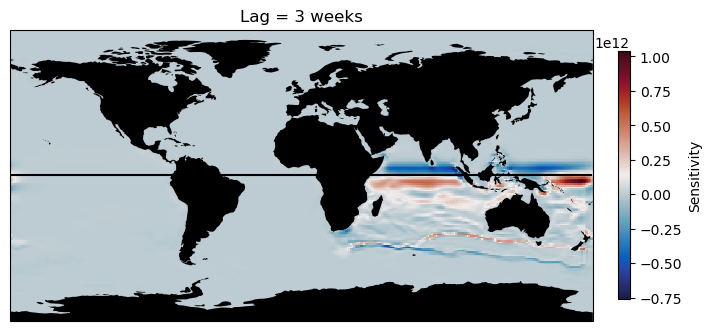

In [47]:
fig,axs = plt.subplots(1,1,figsize=(8,4),subplot_kw={'projection':ccrs.PlateCarree()})

lag = 3

# Plot results at zero lag

im1 = axs.pcolormesh(lons,lats,adj_rg[nt-lag-1],transform=ccrs.PlateCarree(),
                        cmap=cm.balance)#,vmax = 0.00005,vmin=-0.00005)
eqline = axs.plot(np.arange(-180,180),np.zeros(360),'-k',transform=ccrs.PlateCarree())
axs.add_feature(cfeature.LAND,facecolor='k',zorder=10)
plt.colorbar(im1,ax = axs, fraction=0.02, pad=0.04,
             label=r'Sensitivity')
            #label=r'Sensitivity $(\frac{m}{N/m^2})$')
plt.title(f'Lag = {lag} weeks')